## Project -1: Statistical NLP
## PART 2 Chatbot
#### By Ajay Kumar

• DOMAIN: Customer support

• CONTEXT: Great Learning has a an academic support department which receives numerous support requests every day throughout the 
year. Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to 
heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a 
proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can 
interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request 
to an actual human support executive if the request is complex or not in it’s database.

• DATA DESCRIPTION: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics 
skills.

• PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following: 

1. Start chat session with greetings and ask what the user is looking for.

2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. 

3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.
Please use the sample chatbot demo video for reference.

• EVALUATION: GL evaluator will use linguistics to twist and turn sentences to ask questions on the topics described in DATA DESCRIPTION 
and check if the bot is giving relevant replies.

In [203]:
# Mounting google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
# Importing the the required library
import pandas as pd
import numpy as np
import json

In [205]:
# Loading GL Bot json file
json_file = '/content/drive/MyDrive/AIML/NLP/Project/GL Bot.json'

In [206]:
with open(json_file) as f:
  corpus = json.load(f)

In [207]:
display(corpus)

{'intents': [{'context_set': '',
   'patterns': ['hi',
    'how are you',
    'is anyone there',
    'hello',
    'whats up',
    'hey',
    'yo',
    'listen',
    'please help me',
    'i am learner from',
    'i belong to',
    'aiml batch',
    'aifl batch',
    'i am from',
    'my pm is',
    'blended',
    'online',
    'i am from',
    'hey ya',
    'talking to you for first time'],
   'responses': ['Hello! how can i help you ?'],
   'tag': 'Intro'},
  {'context_set': '',
   'patterns': ['thank you',
    'thanks',
    'cya',
    'see you',
    'later',
    'see you later',
    'goodbye',
    'i am leaving',
    'have a Good day',
    'you helped me',
    'thanks a lot',
    'thanks a ton',
    'you are the best',
    'great help',
    'too good',
    'you are a good learning buddy'],
   'responses': ['I hope I was able to assist you, Good Bye'],
   'tag': 'Exit'},
  {'context_set': '',
   'patterns': ['olympus',
    'explain me how olympus works',
    'I am not able to understa

## Data pre-processing

In [208]:
# Extracting the data from the corpus
X_train = []
y_train = []

labels = []
responces = []

for intent in corpus['intents']:
  for pattern in intent['patterns']:
    X_train.append(pattern)
    y_train.append(intent['tag'])
    responces.append(intent['responses'])
  
  # Adding missing tag if any
  if intent['tag'] not in labels:
    labels.append(intent['tag'])

**I have extracted the training documents in X_train and labels in y_train**

In [209]:
# No of classes
num_classes = len(labels)
print(num_classes)

8


In [210]:
print(X_train)

['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time', 'thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy', 'olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with olympus', 'olypus is not a good tool', 'lot of problems with olympus', 'how to use olympus', 'teach me olympus', 'i am not able to understand svm', 'explain me how machine learning works', 'i am not able to understand naive bayes', 'i am n

In [211]:
print(y_train)

['Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Tick

In [212]:
print(labels)

['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket']


**There are total 8 labels in target variable**

In [213]:
print(responces)

[['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['Hello! how can i help you ?'], ['I hope I was able to assist you, Good Bye'], ['I hope I was able to assist you, Good Bye'], ['I hope I was able to assist you, Good Bye'], ['I hope I was able to assist you, Good Bye'], ['I hope I was able to assist you, Good Bye'], ['I hope I was able to assist you, Good Bye'], ['I hope I was able to assist you, Good Bye'], ['I hope I

In [214]:
# Using labelEncoder to label the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [215]:
y_train = encoder.fit_transform(y_train)
print(y_train)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 5
 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7]


## Build the Tokenizer using tensorflow and keras

In [216]:
import tensorflow as tf

In [217]:
desired_vocab_size = 100000 # Vocablury size
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=desired_vocab_size, oov_token='<OOV>')

In [218]:
tokenizer.fit_on_texts(X_train)

In [219]:
print(tokenizer.word_index)

{'<OOV>': 1, 'to': 2, 'not': 3, 'i': 4, 'am': 5, 'understand': 6, 'you': 7, 'able': 8, 'olympus': 9, 'are': 10, 'a': 11, 'learning': 12, 'is': 13, 'me': 14, 'good': 15, 'boosting': 16, 'how': 17, 'of': 18, 'what': 19, 'hours': 20, 'help': 21, 'deep': 22, 'neural': 23, 'from': 24, 'my': 25, 'thanks': 26, 'see': 27, 'lot': 28, 'explain': 29, 'works': 30, 'working': 31, 'no': 32, 'unable': 33, 'regression': 34, 'knn': 35, 'ada': 36, 'nets': 37, 'your': 38, 'solution': 39, 'hey': 40, 'please': 41, 'batch': 42, 'for': 43, 'time': 44, 'later': 45, 'the': 46, 'link': 47, 'problem': 48, 'with': 49, 'machine': 50, 'naive': 51, 'bayes': 52, 'logistic': 53, 'ensemble': 54, 'gradient': 55, 'very': 56, 'artificial': 57, 'propagation': 58, 'epoch': 59, 'name': 60, 'stupid': 61, 'bot': 62, 'useless': 63, 'hi': 64, 'anyone': 65, 'there': 66, 'hello': 67, 'whats': 68, 'up': 69, 'yo': 70, 'listen': 71, 'learner': 72, 'belong': 73, 'aiml': 74, 'aifl': 75, 'pm': 76, 'blended': 77, 'online': 78, 'ya': 79, 

In [220]:
X_train[0] # Before tokenizer

'hi'

In [221]:
X_train = tokenizer.texts_to_sequences(X_train)

In [222]:
X_train[0] # After Tokenizer

[64]

## Pad Sequences - for Train

In [223]:
#Define maximum number of words to consider in each text
max_review_length = 20

In [224]:
# Using pad sequences for equal length of documents
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_review_length, padding='pre', truncating='post')

In [225]:
# Random visualization of train data
num = np.random.randint(0, X_train.shape[1])
X_train[num]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 75, 42], dtype=int32)

## Building the Model

In [226]:
# Initializing the model
embedding_dim = 16
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [227]:
model .add(tf.keras.layers.Embedding(input_dim=desired_vocab_size, output_dim=embedding_dim, input_length=max_review_length))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [228]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            1600000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
Total params: 1,600,680
Trainable params: 1,600,680
Non-trainable params: 0
_________________________________________________________________


In [229]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [230]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1) # Early stoping to check the loss

In [231]:
model.fit(X_train, np.array(y_train), epochs=400, callbacks=early)

Epoch 1/400
4/4 [==============================] - 1s 21ms/step - loss: 2.0782 - accuracy: 0.1250
Epoch 2/400
4/4 [==============================] - 0s 19ms/step - loss: 2.0728 - accuracy: 0.2500
Epoch 3/400
4/4 [==============================] - 0s 22ms/step - loss: 2.0689 - accuracy: 0.2266
Epoch 4/400
4/4 [==============================] - 0s 25ms/step - loss: 2.0658 - accuracy: 0.2266
Epoch 5/400
4/4 [==============================] - 0s 20ms/step - loss: 2.0623 - accuracy: 0.2266
Epoch 6/400
4/4 [==============================] - 0s 21ms/step - loss: 2.0589 - accuracy: 0.2266
Epoch 7/400
4/4 [==============================] - 0s 19ms/step - loss: 2.0552 - accuracy: 0.2266
Epoch 8/400
4/4 [==============================] - 0s 19ms/step - loss: 2.0507 - accuracy: 0.2266
Epoch 9/400
4/4 [==============================] - 0s 20ms/step - loss: 2.0464 - accuracy: 0.2266
Epoch 10/400
4/4 [==============================] - 0s 18ms/step - loss: 2.0414 - accuracy: 0.2266
Epoch 11/400
4/4 [=

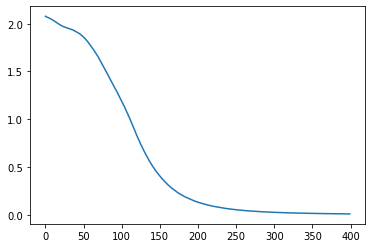

In [232]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss']);

**The Training loss is gradually decreasing**

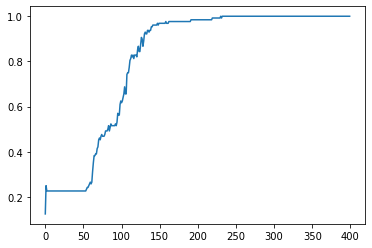

In [233]:
plt.plot(model.history.history['accuracy']);

**Accuracy is also gradually increasing**

## Saving the model

In [234]:
import pickle

In [235]:
# Changing the directory
%cd '/content/drive/MyDrive/AIML/NLP/Project'

/content/drive/MyDrive/AIML/NLP/Project


In [236]:
!ls -l 

total 1074744
-rw------- 1 root root 800419647 Aug 19 10:25  blogtext.csv
-rw------- 1 root root 299119618 Aug 18 14:07  blogtext.csv.zip
-rw------- 1 root root    800526 Aug 25 11:49  Copy_of_Project_1_Statistical_NLP.ipynb
-rw------- 1 root root      6520 Aug 25 05:14 'GL Bot.json'
drwx------ 4 root root      4096 Aug 25 16:24  GL_Support_Chatbot
-rw------- 1 root root       466 Aug 25 16:24  label_encoder.pickel
-rw------- 1 root root     68072 Aug 25 16:50  Part_2_Chatbot.ipynb
-rw------- 1 root root    112967 Aug 19 10:15 'Project -1: Statistical NLP.ipynb'
-rw------- 1 root root      4582 Aug 25 16:24  tokenizer.pickel


In [237]:
# Saving the trained model
model.save('GL_Support_Chatbot')

# Saving the fitted tokenizer
with open('tokenizer.pickel', 'wb') as token:
  pickle.dump(tokenizer, token, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the fitted label encoder
with open('label_encoder.pickel', 'wb') as encoded_file:
  pickle.dump(encoder, encoded_file, protocol=pickle.HIGHEST_PROTOCOL)


INFO:tensorflow:Assets written to: GL_Support_Chatbot/assets


## Evaluate or test the chatbot

In [238]:
# Function to check the chatbot
def chat():

  # Loading the trained model
  model = tf.keras.models.load_model('GL_Support_Chatbot')

  # Loading the tokenizer object
  with open('tokenizer.pickel', 'rb') as f:
    tokenizer = pickle.load(f)

  # Loading the encoder object
  with open('label_encoder.pickel', 'rb') as f:
    lbl_encoder = pickle.load(f)

  max_len =20
  print ("Welcome to Great Learning.")
  print ("I'm Sparta, your GL virtual assitant. How may I help you?")
  print ("Note: You can type 'quit' to end the session")
  print('If you want to talk to customer care. Dial on 1800505050')

  # Initiating the While loop to run the chatbot indefinetely
  while True:
    print('')
    print('User:', end='')

    # Takes the user input and converts all characters to lowercase 
    inp = input()

    # Defining the chatbot exit condition
    if inp.lower() =='quit':
      print("Sparta: Thank you for visiting Great Learning support. Stay safe.")
      break
    result = model.predict(tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_review_length))
    tag = lbl_encoder.inverse_transform([np.argmax(result)])

    count = 0
    matched_intent = None
        
    for i in corpus['intents']:
      if i['tag'] == tag:
        print("Sparta:", np.random.choice(i['responses']))      

In [239]:
chat()

Welcome to Great Learning.
I'm Sparta, your GL virtual assitant. How may I help you?
Note: You can type 'quit' to end the session
If you want to talk to customer care. Dial on 1800505050

User:good morning
Sparta: I hope I was able to assist you, Good Bye

User:hey i still here
Sparta: Hello! how can i help you ?

User:what is your name
Sparta: I am your virtual learning assistant

User:i want real man
Sparta: Hello! how can i help you ?

User:real man
Sparta: Hello! how can i help you ?

User:you stupid call your boss
Sparta: Please use respectful words

User:i will kick you
Sparta: I hope I was able to assist you, Good Bye

User:you monkey talk to me
Sparta: Hello! how can i help you ?

User:i want help in deep learning
Sparta: Link: Neural Nets wiki

User:great
Sparta: I hope I was able to assist you, Good Bye

User:thank you
Sparta: I hope I was able to assist you, Good Bye

User:quit
Sparta: Thank you for visiting Great Learning support. Stay safe.
